## OTROS MODELOS: K-NEAREST NEIGHBOURS

Para introducir el KNN volvemos a encontrarnos con un personaje tan querido como odiado: Dena Aidone. En esta ocasión le han planteado un problema diferentes. Y sí, si crees que vuelven los vectores y las distancias, estás en lo cierto pero ya no tendrás que crearlos a mano, ni con numpy, solo recordarlos un poco. Vamos con Dena.

### Un nuevo problema para Dena Aidone: Harry Potter o Katnis Everdeen

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

La dirección se está planteando renovar la mediateca y quiere saber si debe invertir más en las películas de Harry Potter o en las de Los Juegos del Hambre, para eso le gustaría saber si sus alumnos prefieren unas u otras pero no quiere preguntarles directamente porque ya les atiborra a mil encuestas. Así que le pide ayuda a Dena Aidon. 

Esta les propone hacer un modelo de predicción basado en algo llamado Boosted Trees que a la dirección le suena a chino espacial y le dice que no hay más dinero para ordenadores. Que solo dispone de los datos de las encuestas del pasado (o sea las de su clase en las que sí se preguntaba por Harry Potter y por Katnis Everdeen) y las encuestas actuales (en las que no).

Resumiendo:

- Dena parte del siguiente dataset de entrenamiento:


In [2]:

alumnos_aidone = {'Rodrigo': [1.63, 81, 0],
 'Lucia': [1.5, 74, 1],
 'Alejandro': [1.5, 54, 0],
 'Valeria': [1.93, 64, 1],
 'Javier': [1.5, 66, 0],
 'Camila': [1.71, 71, 1],
 'Diego': [1.95, 45, 1],
 'Gabriela': [1.54, 49, 0],
 'Mateo': [1.86, 50, 1],
 'Sofía': [1.77, 70, 0]
 }


Y tiene que predecir el gusto del siguiente dataset de test:

In [3]:
nuevos_alumnos = {
 'William': [1.52, 72],
 'Emily': [1.52, 52],
 'Alexander': [1.93, 65],
 'Olivia': [1.51, 68],
 'Benjamin': [1.73, 69],
 'Sophia': [1.96, 40],
 'Henry': [1.55, 51],
 'Isabella': [1.87, 53],
 'James': [1.77, 70],
 'Charlotte': [1.65, 84]
}

En el que los vectores corresponde a la altura, el peso y 0 para los que prefieren a Harry y 1 para los fans de Katnis (en el caso de los nuevos alumnos). Son muy pocos datos para un algoritmo de los que hemos aprendido, así que tira de caja de herramientas y decide aplicar un KNN. 

### KNN:

El K-NN (K-Nearest Neighbours) para clasificación es un algoritmo muy sencillo: Dado un dataset de entrada, si quiero predecir una variable para un nuevo elemento o instancia, se procede así:

1- Obtengo los K elementos del dataset de train que están más cerca del nuevo elemento. Sí, como cuando veíamos que alumno tenía un vector a menor distancia de los alumnos de referencia, pero ahora escojo los K más cercanos. Utilizo todas las variables o dimensiones del vector disponibles menos la que quiero calcular. 

2- Si la variable es categórica, se obtiene el hard-voting de los vecinos es decir se asigna la moda para dicha variable de los vecinos escogidos en el paso anterior.

3- Si la variable es numérica, se obtiene la media para los vecinos y esa media es el valor que se "predice" o asigna.

Así de sencillo... No, no vamos a programarlo, dejaremos que `sklearn` haga el trabajo por nosotros. Pero antes véamoslo a mano con nuestra clase.

**La clase de Dena**

El siguiente diagrama ilustra la clase de Dena en la que hemos incluido a William y a Sophia, dos de los nuevos alumnos para los que hay que "predecir" el gusto:

In [4]:


def pinta_alumnos(diccionario_vectores, etiquetas_leyendas = ["Harry","Katnis"], etiquetas_colores = ["black","red"]):
    # Separar los componentes de los vectores y las claves
    fig, axs = plt.subplots(figsize = (7,7))
    xs = {}
    ys = {}
    colores = {}
    etiquetas = {}
    for etiqueta in etiquetas_leyendas:
        xs[etiqueta] =[]
        ys[etiqueta] = []
        colores[etiqueta] = []
        etiquetas[etiqueta] = []

    for clave, vector in diccionario_vectores.items():
        xs[etiquetas_leyendas[vector[2]]].append(vector[0])
        ys[etiquetas_leyendas[vector[2]]].append(vector[1])
        colores[etiquetas_leyendas[vector[2]]].append(etiquetas_colores[vector[2]])
        etiquetas[etiquetas_leyendas[vector[2]]].append(clave)

    # Crear el scatter plot
    for etiqueta in etiquetas_leyendas:
        if etiqueta in xs:
            axs.scatter(xs[etiqueta], ys[etiqueta], c=colores[etiqueta], label = etiqueta)
            for i, nombre in enumerate(etiquetas[etiqueta]):
                axs.annotate(nombre, (xs[etiqueta][i], ys[etiqueta][i]))
    
    # Anotar cada punto con su clave
    

    # Configurar el gráfico
    axs.grid(False) # Desactivar la rejilla
    axs.set_xlabel("Altura")
    axs.set_ylabel("Peso")
    axs.legend()
    return axs

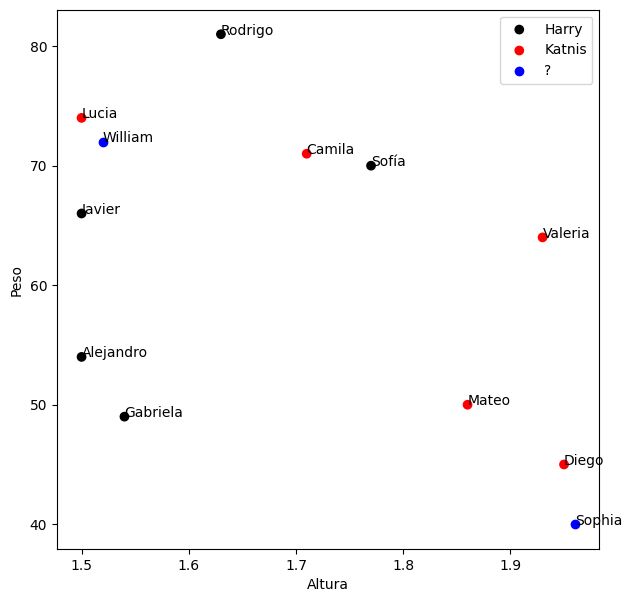

In [5]:
fig = pinta_alumnos(alumnos_aidone)
vec_will = nuevos_alumnos["William"]
vec_soph = nuevos_alumnos["Sophia"]
fig.scatter([vec_will[0],vec_soph[0]],[vec_will[1], vec_soph[1]], color = "blue", label = "?")
plt.annotate("William",(vec_will))
plt.annotate("Sophia", (vec_soph))
fig.legend()

Suponiendo K = 3:

- La predicción de William saldrá de considerar a Lucia, Rodrigo y Javier
- La predicción de Sophia saldrá de considerar a Diego, Mateo, Valeria

**

### Implementacion

Veamos como se implementa:

In [6]:
# Convertimos los diccionarios en X,y

train_set = pd.DataFrame([(clave,vec[0],vec[1],vec[2]) for clave,vec in alumnos_aidone.items()], columns = ["alumno","altura","peso","preferencia"])
train_set.set_index("alumno", inplace = True)
train_set

,altura,peso,preferencia
alumno,,,
Rodrigo,1.63,81,0
Lucia,1.50,74,1
Alejandro,1.50,54,0
Valeria,1.93,64,1
Javier,1.50,66,0
Camila,1.71,71,1
Diego,1.95,45,1
Gabriela,1.54,49,0
Mateo,1.86,50,1


In [7]:
test_set = pd.DataFrame([(clave,vec[0],vec[1]) for clave,vec in nuevos_alumnos.items()], columns = ["alumno","altura","peso"])
test_set.set_index("alumno",inplace = True)
test_set

,altura,peso
alumno,,
William,1.52,72
Emily,1.52,52
Alexander,1.93,65
Olivia,1.51,68
Benjamin,1.73,69
Sophia,1.96,40
Henry,1.55,51
Isabella,1.87,53
James,1.77,70


In [8]:

knn = KNeighborsClassifier(n_neighbors=3)

X = train_set[['altura','peso']].copy()
y = train_set['preferencia']

knn.fit(X,y)

prediccion = knn.predict(test_set)
test_set["Prediccion"] = np.where(prediccion == 0, "Harry","Katnis")
test_set

,altura,peso,Prediccion
alumno,,,
William,1.52,72,Katnis
Emily,1.52,52,Harry
Alexander,1.93,65,Harry
Olivia,1.51,68,Harry
Benjamin,1.73,69,Harry
Sophia,1.96,40,Katnis
Henry,1.55,51,Harry
Isabella,1.87,53,Harry
James,1.77,70,Katnis


Hmmm pero esto no es lo que esperábamos... es sensible a la escala

### Sensible a la escala

Tenemos que escalar:

In [9]:
scaler = StandardScaler()
X[["altura","peso"]] = scaler.fit_transform(X[["altura","peso"]])
test_set[["altura","peso"]] = scaler.transform(test_set[["altura","peso"]])

In [10]:

knn.fit(X,y)

prediccion = knn.predict(test_set[["altura","peso"]])
test_set["Prediccion"] = np.where(prediccion == 0, "Harry","Katnis")
test_set

,altura,peso,Prediccion
alumno,,,
William,-0.983473,0.831052,Harry
Emily,-0.983473,-0.900306,Harry
Alexander,1.402467,0.225077,Katnis
Olivia,-1.041666,0.484780,Katnis
Benjamin,0.238594,0.571348,Harry
Sophia,1.577048,-1.939121,Katnis
Henry,-0.808892,-0.986874,Harry
Isabella,1.053305,-0.813738,Katnis
James,0.471369,0.657916,Katnis


### Selección de la K

• La mejor elección de k depende fundamentalmente 
de los datos.  
• No existen métodos estadísticos predefinidos para 
encontrar el valor más favorable de K.  
• Iniciamos un valor K aleatorio y calculamos.  
• Investigación “iterativa”.  
• Elegir valores pequeños de K conduce a límites de 
decisión muy sensibles o inestables.   
• Para clasificar, elegir valores mayores de K nos 
suaviza esos límites de decisión (reducimos efecto 
ruido)